# Spark Funds - EDA Assignment 
## Name : <font color='Green'>Sameer Gadicherla</font>      Batch : <font color='Green'> 31st March 2021 </font>

## 1. Data Cleaning

### Loading the datasets

In [85]:
## import the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings
warnings.filterwarnings("ignore")
# import plotly.express as px

In [86]:
# load the datasets into two different dataframes
companies = pd.read_csv("Data/companies.csv", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("Data/rounds2.csv", encoding = "ISO-8859-1")

In [87]:
# print the heads to see how the data looks
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [88]:
companies.shape

(66368, 10)

In [89]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000


In [90]:
# getting number of unique companies in companies df
companies.describe()
# There are 66368 unique permalinks as seen below

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Couponcabin,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [91]:
# getting number of unique companies in rounds2 df
rounds2.company_permalink.describe()
# There are 90247 unique permalinks out of 114949 as seen below

count                       114949
unique                       90247
top       /ORGANIZATION/SOLARFLARE
freq                            10
Name: company_permalink, dtype: object

In [92]:
# lowercase the permalinks so that its standardised accross the two dataframes
companies.permalink = companies.permalink.apply(lambda x: x.lower())
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [93]:
# checking the number of companies which are present in rounds but not in companies df
not_present = rounds2[~rounds2.company_permalink.isin(companies.permalink)]

In [94]:
not_present
# we see that there are seven such companies
#looks like the permalinks have special characters

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.000
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


In [95]:
## lets rename the company_permalink field in rounds2 df to permalink so that we can merge both the dataframes on this column

rounds2 = rounds2.rename(columns = {"company_permalink": "permalink"})

In [96]:
## lets check the shape of rounds2 before we add extra companies from companies df
rounds2.shape

(114949, 6)

In [97]:
rounds2

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.000
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.000
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.000
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.000


In [98]:
master_frame = companies.merge(rounds2,how="inner",on="permalink")

In [99]:
org_shape = master_frame.shape
org_shape

(114942, 15)

In [100]:
100 * (master_frame.isnull().sum()/master_frame.shape[0])

permalink                  0.000
name                       0.001
homepage_url               5.335
category_list              2.964
status                     0.000
country_code               7.544
state_code                 9.517
region                     8.839
city                       8.837
founded_at                17.852
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        72.909
funded_at                  0.000
raised_amount_usd         17.386
dtype: float64

- The reason why we chose permalink as unique is because we can see 0% null values.
- We cannot use <font color = "blue">name</font> as unique key ,because it has missing values

In [101]:
## Let us drop the columns which we dont plan working with 
master_frame = master_frame.drop(columns =["funding_round_code","funding_round_permalink","funded_at","founded_at","city","region","state_code","status","homepage_url","name"])
master_frame.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.000
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,venture,nan
2,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.000
3,/organization/-the-one-of-them-inc-,Apps|Games|Mobile,NaN,venture,3406878.000
4,/organization/0-6-com,Curated Web,CHN,venture,2000000.000


In [102]:
## lets print the missing values count again
master_frame.isnull().sum()/master_frame.shape[0]

permalink            0.000
category_list        0.030
country_code         0.075
funding_round_type   0.000
raised_amount_usd    0.174
dtype: float64

In [103]:
## funded amount column has around 17.3% missing values.
master_frame[master_frame.raised_amount_usd.isnull()].shape

(19984, 5)

#### We see that there are around ~20K values missing for the funded amount. Let's drop them
- The reason why we are dropping them instead of imputing values is:
    - It depends on lot of other factors apart from just imputi

In [104]:
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [105]:
master_frame.isnull().sum()/master_frame.shape[0]

permalink            0.000
category_list        0.011
country_code         0.062
funding_round_type   0.000
raised_amount_usd    0.000
dtype: float64

In [106]:
### Around 6% of records do not have country code. Country code is important for us as we are looking for investing in countries
print(master_frame[master_frame.country_code.isnull()].shape)
##lets drop these records
master_frame = master_frame[~master_frame.country_code.isnull()]

(5850, 5)


In [107]:
## since we are focussing on which sector to invest in as well, these below missing records need to be dropped
print(master_frame[master_frame.category_list.isnull()].shape)
##lets drop these records
master_frame = master_frame[~master_frame.category_list.isnull()]

(579, 5)


### We want to focus only on the main four types of Funding:
### Venture - Seed - Angel - Private Equity

In [108]:
### Lets Drop all the Other Rows which dont fall in the above funding types
master_frame = master_frame[master_frame.funding_round_type.isin(["venture","seed","private_equity","angel"])]

In [109]:
## printing the master_frame shape again
refined_shape = master_frame.shape
refined_shape

(75124, 5)

In [110]:
### Total records dropped
print("Total Records Dropped: " , org_shape[0] - refined_shape[0])
print("Percentage of Records Dropped: " , 100*(org_shape[0] - refined_shape[0])/org_shape[0])

Total Records Dropped:  39818
Percentage of Records Dropped:  34.64181935236902


In [111]:
## lets make sure we have dropped all the missing data
master_frame.isnull().sum()/master_frame.shape[0]

permalink            0.000
category_list        0.000
country_code         0.000
funding_round_type   0.000
raised_amount_usd    0.000
dtype: float64

In [112]:
### Lets get the most representative values of each funding type
median_values = master_frame.groupby("funding_round_type")["raised_amount_usd"].median().to_frame()
median_values

,raised_amount_usd
funding_round_type,
angel,414906.000
private_equity,20000000.000
seed,300000.000
venture,5000000.000


In [114]:
y = list(median_values["raised_amount_usd"])
x = list(median_values.index)
print(x,y)

['angel', 'private_equity', 'seed', 'venture'] [414906.0, 20000000.0, 300000.0, 5000000.0]


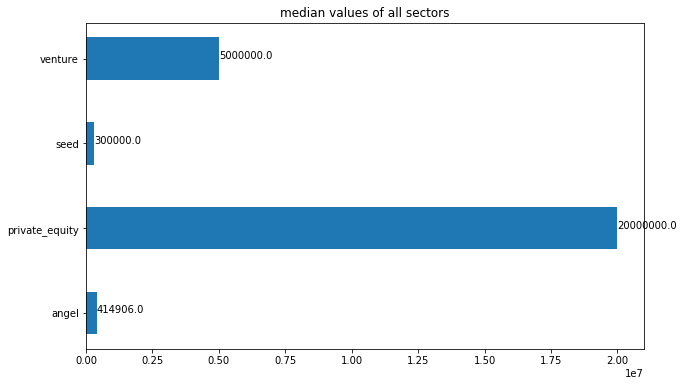

In [135]:
plt.figure(figsize=(10,6))
plt.barh(x, y,0.5)

plt.title('median values of all sectors')
for index, value in enumerate(y):
    plt.text(value, index, str(value))

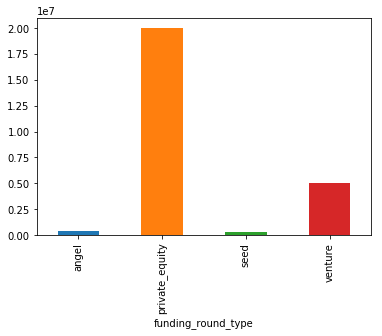

In [30]:
master_frame.groupby("funding_round_type")["raised_amount_usd"].median().plot.bar()

In [31]:
master_frame.groupby("funding_round_type")["funding_round_type"].count()

funding_round_type
angel              4400
private_equity     1820
seed              21095
venture           47809
Name: funding_round_type, dtype: int64

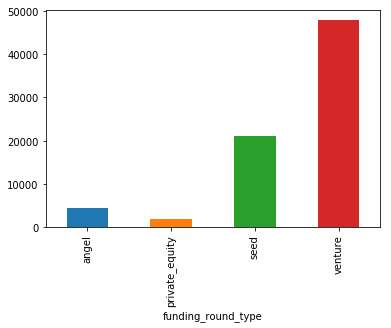

In [32]:
master_frame.groupby("funding_round_type")["funding_round_type"].count().plot.bar()

## Observations:
 - we see above that most of the investments are happening in the venture level funding 
 - It falls in the range of budget provided by spark funds as well
 - It's median value is 5M
 - It's the one which has the highest count as well

In [33]:
## Let's remove records which aren't of venture type funding
master_frame = master_frame[master_frame.funding_round_type == "venture"]

In [34]:
master_frame.shape

(47809, 5)

## Country Analysis
### Investing in Countries where most other countries have invested

In [35]:
master_frame.groupby("country_code")["country_code"].count().to_frame().sort_values("country_code",ascending=False)

,country_code
country_code,
USA,35943
GBR,2041
CHN,1548
CAN,1246
FRA,912
IND,819
ISR,786
DEU,554
ESP,316


- Clearly in terms of investments count, USA dominates any other country!

In [36]:
temp_df = pd.DataFrame({})
temp_df["Funding"] = master_frame.groupby("country_code")["raised_amount_usd"].sum()
temp_df = temp_df.sort_values("Funding",ascending= False)

#printing the top 9 countries based on the highest funding in all rounds - SUM
top9 = temp_df.iloc[0:9]
print(top9)


                      Funding
country_code                 
USA          420068029342.000
CHN           39338918773.000
GBR           20072813004.000
IND           14261508718.000
CAN            9482217668.000
FRA            7226851352.000
ISR            6854350477.000
DEU            6306921981.000
JPN            3167647127.000


Text(0.5,1,'Top 9 Countries based on Funding')

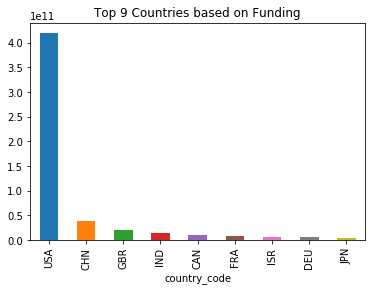

In [137]:
### lets see how they look when plotted on based of sum of the funding
top9.Funding.plot.bar()
plt.title("Top 9 Countries based on Funding")

## Observations
<ol><li> USA , GBR , IND are the top three English Speaking countries after checking the wiki page </li> <li> CHN isn't an English Speaking Country according to the wiki page </li></ol>

## Sector Analysis - 1

In [38]:
# lets load the mapping csv into a df
mapping = pd.read_csv("../EDA_SparkFunds/Data/mapping.csv")

In [39]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [40]:
## Column check: Blank is a column is which can be dropped(optional) and is used only for the first row which is empty
mapping.Blanks.sum()

1

In [41]:
x = mapping[mapping.category_list == str("Accounting")].iloc[0]
x[x == 1].axes[0][0]

'Social, Finance, Analytics, Advertising'

In [42]:
### write a function which takes the category name as the parameter and gives the main sector as the answer
def get_main_sector(category):
    try:
        x = mapping[mapping.category_list == str(category)].iloc[0]
        return x[x == 1].axes[0][0]
    except:
        ## We see that there are few primary sectors/categories which do not fall into any of the main sectors, lets 
        ## keep them them into Others
        return None
get_main_sector("3D")

'Manufacturing'

In [43]:
## create a derived column for primary sector by using the name before '|'
master_frame["primary_sector"] = master_frame.category_list.apply(lambda x: str(x).split("|")[0])

In [44]:
## main_sector column using primary sector
master_frame["main_sector"] = master_frame.primary_sector.apply(lambda x: get_main_sector(x))

In [45]:
### records with no main_sector mapping
no_main_sector = master_frame[master_frame.main_sector.isnull()]
no_main_sector

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
10,/organization/0xdata,Analytics,USA,venture,20000000.000,Analytics,None
11,/organization/0xdata,Analytics,USA,venture,1700000.000,Analytics,None
12,/organization/0xdata,Analytics,USA,venture,8900000.000,Analytics,None
61,/organization/100plus,Analytics,USA,venture,500000.000,Analytics,None
148,/organization/19pay,Finance|FinTech,CHN,venture,6230000.000,Finance,None
198,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,USA,venture,2500000.000,Analytics,None
199,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,USA,venture,500000.000,Analytics,None
200,/organization/1world-online,Analytics|Big Data|Enterprise Software|Market ...,USA,venture,1000000.000,Analytics,None
256,/organization/24-7-card,Finance,USA,venture,3452941.000,Finance,None
713,/organization/51credit-com,Finance,CHN,venture,10000000.000,Finance,None


In [46]:
## the following primary sectors do not have a mapping (3117 entries)
no_main_sector.groupby("primary_sector")["primary_sector"].count().to_frame().sort_values("primary_sector",ascending=False)

,primary_sector
primary_sector,
Analytics,1496
Finance,742
Nanotechnology,155
Financial Services,131
Big Data Analytics,112
Career Management,71
Cloud Management,47
Event Management,30
Finance Technology,28


In [47]:
## Lets map these missing mappings to the right sectors 
## I will map all the praimry sectors with >= 100 values missing and drop the others

## finetune existing mapping function to map these missing mappings
def get_main_sector(category):
    try:
        x = mapping[mapping.category_list == str(category)].iloc[0]
        return x[x == 1].axes[0][0]
    except:
        if category == "Analytics" or category == "Finance" or category == "Financial Services" or category == "Big Data Analytics":
            return "Social, Finance, Analytics, Advertising"
        elif category == "Nanotechnology":
            return "Cleantech / Semiconductors"
        else:
            return None    

In [48]:
## replace these missing mappings
master_frame["main_sector"] = master_frame.primary_sector.apply(lambda x: get_main_sector(x))

In [49]:
#drop all the primary sectors with less than 100 records
master_frame = master_frame[~master_frame.main_sector.isnull()]

In [50]:
## reprint the data cleaned
refined_shape = master_frame.shape
print("Total Records Dropped: " , org_shape[0] - refined_shape[0])
print("Percentage of Records Dropped: " , 100*(org_shape[0] - refined_shape[0])/org_shape[0])


Total Records Dropped:  67614
Percentage of Records Dropped:  58.82445059247272


In [51]:
## investments based on main_sector
master_frame.groupby("main_sector")["main_sector"].count()

main_sector
Automotive & Sports                          735
Cleantech / Semiconductors                 10033
Entertainment                               2698
Health                                      3951
Manufacturing                               3281
News, Search and Messaging                  5903
Others                                     11316
Social, Finance, Analytics, Advertising     9411
Name: main_sector, dtype: int64

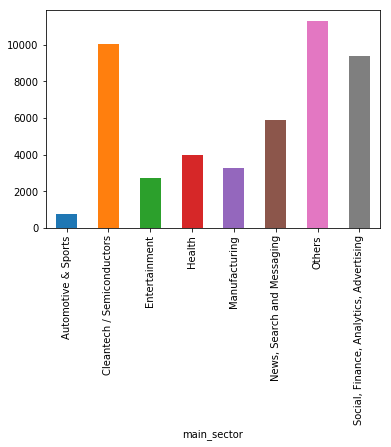

In [52]:
master_frame.groupby("main_sector")["main_sector"].count().plot.bar()

## Observations:
 <ol><li>As of now we see that Others is highly contributed sectors</li><li>CleanTech/Semiconductors is the second highest</li></ol>

## Sector Analysis - 2

In [53]:
## lets reduce the master_frame to only USA GBR IND and raised fund is in between 5M and 15M
master_frame = master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

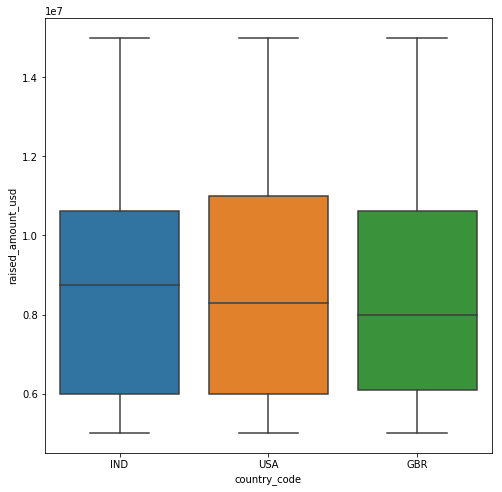

In [54]:
## lets have a look at the outliers
plt.figure(figsize=(8,8))
sns.boxplot(data = master_frame , x="country_code", y="raised_amount_usd")

In [55]:
## Creating DataFrames per country falling within 5M and 15M brackets
usa = master_frame[(master_frame.country_code == "USA")]
gbr = master_frame[(master_frame.country_code == "GBR")]
ind = master_frame[(master_frame.country_code == "IND")]

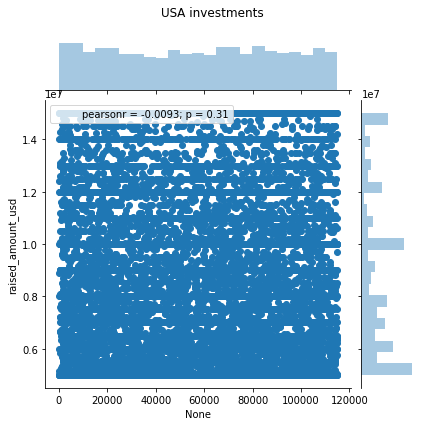

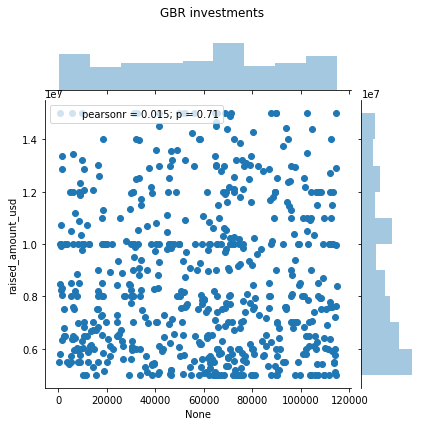

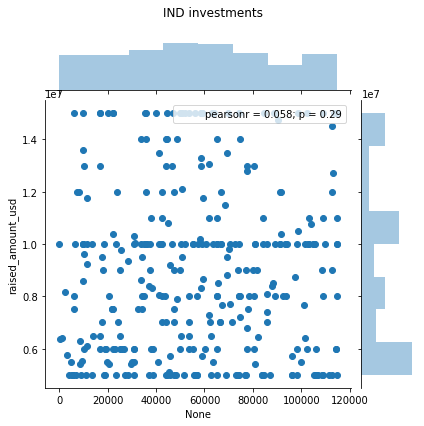

In [56]:
p = sns.jointplot(usa.index,usa.raised_amount_usd)
p.fig.suptitle("USA investments")
p.fig.subplots_adjust(top=0.9)

q = sns.jointplot(gbr.index,gbr.raised_amount_usd)
q.fig.suptitle("GBR investments")
q.fig.subplots_adjust(top=0.9)

r = sns.jointplot(ind.index,ind.raised_amount_usd)
r.fig.suptitle("IND investments")
r.fig.subplots_adjust(top=0.9)
plt.show()

1. We can see that in all the three countries the data points are uniformly scattered across the 5M to 15M range
2. There are chances of proceeding with this data itself, as there is very less scope for outliers

In [57]:
print("USA")
print(usa.raised_amount_usd.describe())
print("----------------------------------------------------------------")
print("GBR")
print(gbr.raised_amount_usd.describe())
print("----------------------------------------------------------------")
print("IND")
print(ind.raised_amount_usd.describe())

USA
count      11945.000
mean     8933498.632
std      3075806.503
min      5000000.000
25%      6001413.000
50%      8300000.000
75%     11000000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64
----------------------------------------------------------------
GBR
count        611.000
mean     8656996.313
std      2864959.060
min      5000000.000
25%      6092165.000
50%      8000000.000
75%     10606760.000
max     15000000.000
Name: raised_amount_usd, dtype: float64
----------------------------------------------------------------
IND
count        327.000
mean     9001662.391
std      3220470.864
min      5000000.000
25%      6000000.000
50%      8750000.000
75%     10620000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64


### If we look at the box plots above , we can say that:
1. GBR and IND have similar 25th and 75th perncentiles
2. std is significantly more in all the three countries and approximately close to 3M
3. All the three countries have median lying nearby to mean
4. IND has a higher representative median value when compared to USA and GBR

In [58]:
## lets check all the investments done in betwenn 10M and 15M
master_frame_higher = master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 10000000) & (master_frame.raised_amount_usd <= 15000000)]

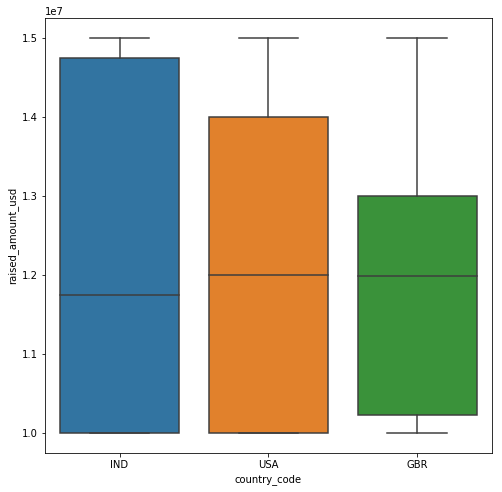

In [59]:
## box plots of 3 countries for investments between 5M and 15M
plt.figure(figsize=(8,8))
sns.boxplot(data = master_frame_higher , x="country_code", y="raised_amount_usd")

In [60]:
usa_10m_plus =usa[usa.raised_amount_usd >= 10000000]
gbr_10m_plus = gbr[gbr.raised_amount_usd >= 10000000]
ind_10m_plus = ind[ind.raised_amount_usd >= 10000000]

In [61]:
usa_10m_plus.raised_amount_usd.describe()

count       4860.000
mean    12104633.871
std      1851714.364
min     10000000.000
25%     10000000.000
50%     12000000.000
75%     14000000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

In [62]:
gbr_10m_plus.raised_amount_usd.describe()

count        221.000
mean    11919486.258
std      1639760.358
min     10000000.000
25%     10234700.000
50%     11985783.000
75%     13004958.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

In [63]:
ind_10m_plus.raised_amount_usd.describe()

count        141.000
mean    12086595.745
std      2095165.807
min     10000000.000
25%     10000000.000
50%     11750000.000
75%     14750000.000
max     15000000.000
Name: raised_amount_usd, dtype: float64

### Observations:
1. We see that there are no significant outliers in the range of 10M to 15M in all the countries
2. India's IQR in 10M-15M range is closer to 15M

In [64]:
### total no of investments in each of these countries
print(usa.shape[0], " investments in USA")
print(gbr.shape[0], "   investments in UK/GBR")
print(ind.shape[0], "   investments in India")

11945  investments in USA
611    investments in UK/GBR
327    investments in India


In [65]:
### total dollars investmented in each of these countries
print(usa.raised_amount_usd.sum(), "dollars invested total in USA")
print(gbr.raised_amount_usd.sum(), "  dollars invested total in UK/GBR")
print(ind.raised_amount_usd.sum(), "  dollars invested total in India")

106710641155.0 dollars invested total in USA
5289424747.0   dollars invested total in UK/GBR
2943543602.0   dollars invested total in India


In [66]:
#sector wise amount raised in USA
usa.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,26089280296.000
"Social, Finance, Analytics, Advertising",23303009024.000
Cleantech / Semiconductors,21607805663.000
"News, Search and Messaging",13796816094.000
Health,8200859357.000
Manufacturing,7258553378.000
Entertainment,5000212982.000
Automotive & Sports,1454104361.000


In [67]:
#sector wise count of investments in USA
usa_count = usa.groupby("main_sector")["raised_amount_usd"].count().to_frame()
usa_count = usa_count.rename(columns={"raised_amount_usd":"no of investments"})
usa_count = usa_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
usa_count_top3 = usa_count.iloc[0:3,:]
usa_count_top3

,no of investments
main_sector,
Others,2923
"Social, Finance, Analytics, Advertising",2658
Cleantech / Semiconductors,2347


In [68]:
#sector wise amount raised in UK
gbr.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,1249124289.000
Cleantech / Semiconductors,1150755399.000
"Social, Finance, Analytics, Advertising",1068758355.000
"News, Search and Messaging",615746235.000
Entertainment,461511059.000
Manufacturing,361940335.000
Health,214537510.000
Automotive & Sports,167051565.000


In [69]:
#sector wise count of investments in UK
gbr_count = gbr.groupby("main_sector")["raised_amount_usd"].count().to_frame()
gbr_count = gbr_count.rename(columns={"raised_amount_usd":"no of investments"})
gbr_count = gbr_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
gbr_count_top3 = gbr_count.iloc[0:3,:]
gbr_count_top3

,no of investments
main_sector,
Others,143
"Social, Finance, Analytics, Advertising",130
Cleantech / Semiconductors,129


In [70]:
#sector wise amount raised in India
ind.groupby("main_sector")["raised_amount_usd"].sum().to_frame().sort_values("raised_amount_usd",ascending=False)

,raised_amount_usd
main_sector,
Others,1007409507.000
"Social, Finance, Analytics, Advertising",550549550.000
"News, Search and Messaging",433834545.000
Entertainment,280830000.000
Manufacturing,200900000.000
Health,167740000.000
Cleantech / Semiconductors,165380000.000
Automotive & Sports,136900000.000


In [71]:
#sector wise count of investments in India
ind_count = ind.groupby("main_sector")["raised_amount_usd"].count().to_frame()
ind_count = ind_count.rename(columns={"raised_amount_usd":"no of investments"})
ind_count = ind_count.sort_values("no of investments",ascending=False)

#top three sectors based on counts in investements
#the column name below is not raised_amount_usd but its the count of investments done
ind_count_top3 = ind_count.iloc[0:3,:]
ind_count_top3

,no of investments
main_sector,
Others,109
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52


In [72]:
## Country-Sector wise sum of investments
pt = pd.pivot_table(data = pd.concat([usa,gbr,ind],axis=0),index=["country_code","main_sector"],aggfunc=np.sum)
pt

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                          167051565.000
             Cleantech / Semiconductors                  1150755399.000
             Entertainment                                461511059.000
             Health                                       214537510.000
             Manufacturing                                361940335.000
             News, Search and Messaging                   615746235.000
             Others                                      1249124289.000
             Social, Finance, Analytics, Advertising     1068758355.000
IND          Automotive & Sports                          136900000.000
             Cleantech / Semiconductors                   165380000.000
             Entertainment                                280830000.000
             Health                                       167740000.000
             Manufacturing                                200900000.000
             News, Search and Messaging                   433834545.000
             Others                                      1007409507.000
             Social, Finance, Analytics, Advertising      550549550.000
USA          Automotive & Sports                         1454104361.000
             Cleantech / Semiconductors                 21607805663.000
             Entertainment                               5000212982.000
             Health                                      8200859357.000
             Manufacturing                               7258553378.000
             News, Search and Messaging                 13796816094.000
             Others                                     26089280296.000
             Social, Finance, Analytics, Advertising    23303009024.000

In [73]:
#other way of seeing sum
total_sum = pt.groupby("country_code")["raised_amount_usd"].sum()
total_sum = total_sum.to_frame()
total_sum

,raised_amount_usd
country_code,
GBR,5289424747.000
IND,2943543602.000
USA,106710641155.000


In [74]:
pt3 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code","main_sector"],values=["raised_amount_usd"],aggfunc=len)

In [75]:
### clear view of all sectors per country with the respective counts
pt3

raised_amount_usd
country_code main_sector                                               
GBR          Automotive & Sports                                 16.000
             Cleantech / Semiconductors                         129.000
             Entertainment                                       54.000
             Health                                              24.000
             Manufacturing                                       42.000
             News, Search and Messaging                          73.000
             Others                                             143.000
             Social, Finance, Analytics, Advertising            130.000
IND          Automotive & Sports                                 13.000
             Cleantech / Semiconductors                          20.000
             Entertainment                                       33.000
             Health                                              19.000
             Manufacturing                                       21.000
             News, Search and Messaging                          52.000
             Others                                             109.000
             Social, Finance, Analytics, Advertising             60.000
USA          Automotive & Sports                                167.000
             Cleantech / Semiconductors                        2347.000
             Entertainment                                      580.000
             Health                                             908.000
             Manufacturing                                      799.000
             News, Search and Messaging                        1563.000
             Others                                            2923.000
             Social, Finance, Analytics, Advertising           2658.000

In [76]:
##create a pivot table with the counts of each category under a country
pt4 = pd.pivot_table(data=master_frame[(master_frame.country_code.isin(["USA","GBR","IND"])) & (master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <=15000000) ],index=["country_code"],columns="main_sector",values="raised_amount_usd",aggfunc=len)

In [77]:
pt4

main_sector,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,
GBR,16.000,129.000,54.000,24.000,42.000,73.000,143.000,130.000
IND,13.000,20.000,33.000,19.000,21.000,52.000,109.000,60.000
USA,167.000,2347.000,580.000,908.000,799.000,1563.000,2923.000,2658.000


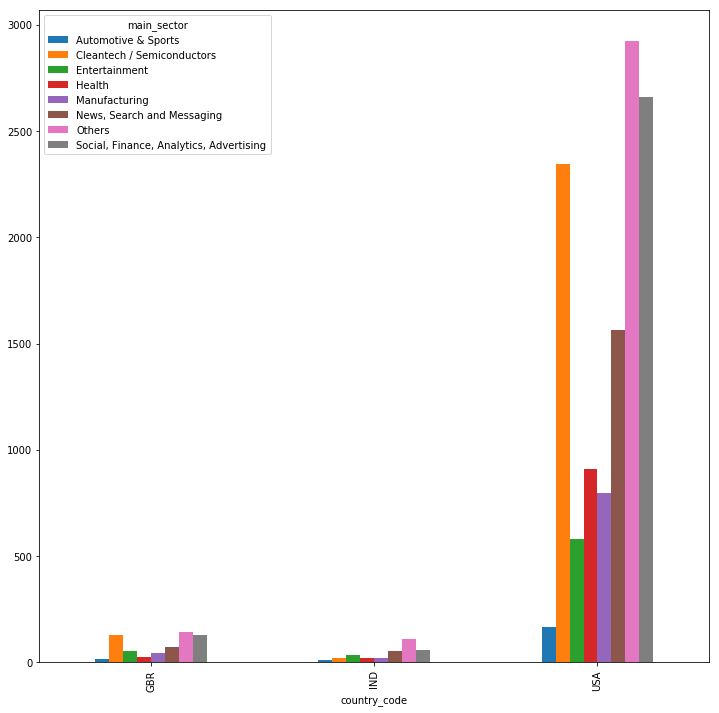

In [78]:
#barplot to see top sectors per country based on count
pt4.plot(kind = "bar" , stacked=False,figsize=(12,12))

In [79]:
# We know that "Others" is the top sector in all the countries
usa_new = usa[(usa.main_sector == "Others") & (usa.raised_amount_usd == usa.raised_amount_usd.max())]
print("No of companies receiving the highest investment in USA for Others sector: ",usa_new.shape[0])
usa_new.loc[:,["permalink","raised_amount_usd"]].sort_values("raised_amount_usd",ascending = False)

No of companies receiving the highest investment in USA for Others sector:  194


,permalink,raised_amount_usd
191,/organization/1stdibs,15000000.000
86769,/organization/seamicro,15000000.000
70568,/organization/onesource-virtual,15000000.000
70641,/organization/onforce,15000000.000
72263,/organization/overture-networks,15000000.000
73025,/organization/panzura,15000000.000
74343,/organization/pepperdata,15000000.000
74736,/organization/pets-com-2,15000000.000
76505,/organization/pliant-technology,15000000.000
77768,/organization/predictix,15000000.000


In [80]:
gbr_new = gbr[(gbr.main_sector == "Others") & (gbr.raised_amount_usd == gbr.raised_amount_usd.max())]
print("No of companies receiving the highest investment in GBR for Others sector: ",gbr_new.shape[0])
gbr_new.loc[:,["permalink","raised_amount_usd"]].sort_values("raised_amount_usd",ascending = False)

No of companies receiving the highest investment in GBR for Others sector:  7


,permalink,raised_amount_usd
9921,/organization/azure-solutions,15000000.000
32364,/organization/environmentiq,15000000.000
49818,/organization/ip-access,15000000.000
68634,/organization/notonthehighstreet,15000000.000
87626,/organization/sensage,15000000.000
89720,/organization/silverrail-technologies,15000000.000
102680,/organization/tribold,15000000.000


In [81]:
ind_new = ind[(ind.main_sector == "Others") & (ind.raised_amount_usd == ind.raised_amount_usd.max())]
print("No of companies receiving the highest investment in India for Others Sector: ",ind_new.shape[0])
ind_new.loc[:,["permalink","raised_amount_usd"]].sort_values("raised_amount_usd",ascending = False)

No of companies receiving the highest investment in India for Others Sector:  15


,permalink,raised_amount_usd
16958,/organization/caratlane,15000000.000
20273,/organization/classteacher-learning-systems,15000000.000
22143,/organization/comat-technologies,15000000.000
22278,/organization/commonfloor,15000000.000
35821,/organization/firstcry-com,15000000.000
39946,/organization/girnarsoft,15000000.000
49908,/organization/ipolicy-networks,15000000.000
50513,/organization/itzcash-card-ltd,15000000.000
51878,/organization/k-12-techno-services,15000000.000
56018,/organization/limeroad,15000000.000


In [82]:
## second top sector is USA is Social/Finance/Analytics/Advertising. Lets see the top company receiving the highest fund
usa_new = usa[(usa.main_sector == "Social, Finance, Analytics, Advertising") & (usa.raised_amount_usd == usa.raised_amount_usd.max())]
print("No of companies receiving the highest investment in USA for 2nd top sector: ",usa_new.shape[0])
usa_new.loc[:,["permalink","raised_amount_usd"]].sort_values("raised_amount_usd",ascending = False)

No of companies receiving the highest investment in USA for 2nd top sector:  188


,permalink,raised_amount_usd
2530,/organization/admeld,15000000.000
84956,/organization/rubiconproject,15000000.000
82220,/organization/redis-labs,15000000.000
83011,/organization/reply-com,15000000.000
83117,/organization/reserve,15000000.000
83353,/organization/retailnext,15000000.000
83725,/organization/rewardstyle,15000000.000
83963,/organization/rightnow-technologies,15000000.000
84331,/organization/robin-systems,15000000.000
84372,/organization/rocana,15000000.000


In [83]:
## for GBR top second sector is Cleantech / Semiconductors , lets see the top company receiving highest funds
gbr_new = gbr[(gbr.main_sector == "Cleantech / Semiconductors") & (gbr.raised_amount_usd == gbr.raised_amount_usd.max())]
print("No of companies receiving the highest investment in GBR for second top sector: ",gbr_new.shape[0])
gbr_new.loc[:,["permalink","raised_amount_usd"]].sort_values("raised_amount_usd",ascending = False)

No of companies receiving the highest investment in GBR for second top sector:  2


,permalink,raised_amount_usd
5575,/organization/anadigm,15000000.000
31105,/organization/elixent,15000000.000


In [84]:
## second top sector is IND is Social/Finance/Analytics/Advertising. Lets see the top company receiving the highest fund
ind_new = ind[(ind.main_sector == "Social, Finance, Analytics, Advertising") & (ind.raised_amount_usd == ind.raised_amount_usd.max())]
print("No of companies receiving the highest investment in India for second top sector: ",ind_new.shape[0])
ind_new.loc[:,["permalink","raised_amount_usd"]].sort_values("raised_amount_usd",ascending = False)

No of companies receiving the highest investment in India for second top sector:  9


,permalink,raised_amount_usd
6313,/organization/apnaloan,15000000.000
35548,/organization/financial-information-network-op...,15000000.000
53645,/organization/komli-media,15000000.000
58936,/organization/manthan-systems,15000000.000
58938,/organization/manthan-systems,15000000.000
58939,/organization/manthan-systems,15000000.000
88785,/organization/shiram-credit,15000000.000
88911,/organization/shopclues-com,15000000.000
102349,/organization/travelguru,15000000.000


## Conclusions
### Based on the Counts - 
1. <font color='Green'>Others, Social-Finance-Analytics-Advertising and CleanTech/SemiConductors</font> are Top sectors in <font color='Blue'>USA</font>
2. <font color='Green'>Others, CleanTech/SemiConductors and Social-Finance-Analytics-Advertising</font> are Top sectors in <font color='Blue'>GBR(UK)</font>
3. <font color='Green'>Others, Social-Finance-Analytics-Advertising and News-Search-Messaging</font> are Top sectors in <font color='Blue'>India</font>

### Implications -
4. There are more than one companies recieving the top fund in USA , GBR and IND under the top sector and the second top sector
5. Since SparkFunds wants to invest in a funding type where most companies do, we have selected <font color = "Green">venture</font> as the best one.
6. Since SparkFunds wants to invest in a top english speaking country , we can invest in <font color = "Green">USA</font> as it has the highest number of investments done among the top three countries including GBR and IND.
7. Since SparkFunds wants to invest in a sector which has the highest number of investments, <font color = "Green"> Others </font> is the one which is highly contributed sector. 
8. But this sector has a little uncertainity because this sector is not focused on Prime Area of Knowledge. Instead if we can invest in the second highest sector in **USA** i.e., **Social-Finance-Analytics-Advertising** , it is kind of a better investment as the domain here is fixed and **2658** investements are done here which are close to **2923** investments done in **Others**.
   - There are 188 companies in which SparkFunds can invest in this particular Sector.
   - Since we have used the ranges 5M to 15M as inclusive , we are seeing more than 1 company receiving the highest fund
   - Outlier removal wasn't necessary due to given reasons before where the budget cap itself helped us eliminate most of them.